In [2]:
import pyvisa as visa
from datetime import datetime
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import openpyxl

###############################################################################
# Basics of using Virtual Instrument Software Architecture (VISA) to connect to
# instruments and sending Standard Commands for Programmable Instruments (SCPI)
# commands.
###############################################################################

# Instantiate the VISA Resource Manager
#rm = visa.ResourceManager()

# Print the available resources
#print("Available resources:")
#print(rm.list_resources())
#print("")


data = pd.read_csv("Thermistor_data.txt", sep= '\t', header = None)
res = data[0]
temp = data[1]
tempK = data[1] + 273
def func(R, a, b, c):
    return a + b*np.log(R) + c*(np.log(R))**3
invt = 1/tempK
params, cov = curve_fit(func, res, invt)
a = params[0]
b = params[1]
c = params[2]
mytemp = 1/func(res, a, b, c)

print(a, b, c)


0.0008491729928160546 0.00020568467343969903 9.075009015490487e-08


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

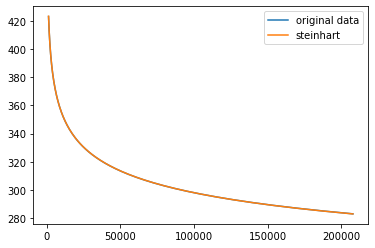

In [7]:
plt.plot(res, tempK, label = 'original data')
plt.plot(res, mytemp, label = 'steinhart')
#plt.plot(res, np.abs(tempK - mytemp), label = 'sub')
plt.legend()
plt.plot

In [2]:
rm = visa.ResourceManager()

CubeRes = rm.open_resource("USB0::0x1AB1::0x0C94::DM3O225000989::INSTR")
HeatMeas = rm.open_resource("USB0::0x0957::0x0A07::MY48002584::INSTR")

# Print the available resources
print("Available resources:")
print(rm.list_resources())
print("")


CubeRes_id = CubeRes.query("*IDN?")
HeatMeas_id = HeatMeas.query("*IDN?")

y = float(CubeRes.query(":MEAS:RES?").rstrip("\n"))
#HeatMeas.query(":MEAS:VOLT:DC?")
print(y)

Available resources:
('USB0::0x0957::0x0A07::MY48002584::INSTR', 'USB0::0x1AB1::0x0C94::DM3O225000989::INSTR')



VisaIOError: VI_ERROR_IO (-1073807298): Could not perform operation because of I/O error.

In [8]:
1/func(92e3, a, b, c) - 273

26.800339431181328

In [5]:
data = [1]
for datum in data:
    time.sleep(0.5)
    y = float(CubeRes.query(":MEAS:RES?").rstrip("\n"))
    Temp = 1/func(y, a, b, c)
    y = float(CubeRes.write(":MEAS:RES"))
    data = []
    data = np.append(data, y)
    print(Temp)

301.2363204661566


In [3]:
y = float(CubeRes.write(":MEAS:RES"))
n_steps = 120
Res = np.empty(n_steps)
Tsteps = np.empty(n_steps)
TempRes = np.empty(n_steps)
Time = 0
for i in range(n_steps):
    y = float(CubeRes.query(":MEAS:RES?").rstrip("\n"))
    Temp = 1/func(y, a, b, c) - 273.15
    Time = Time + 1
    Tsteps[i] = Time
    TempRes[i] = Temp
    print('Time:', Time, 'Resistivity:', y, 'Temperature:', Temp)
    time.sleep(60)

df = pd.DataFrame([Tsteps, TempRes]).transpose()
df.to_csv('4_min.csv', index=False, header=False)
plt.plot(df[0], df[1])

VisaIOError: VI_ERROR_IO (-1073807298): Could not perform operation because of I/O error.

In [ ]:
#df = pd.DataFrame([Tsteps, TempRes]).transpose()
#df.to_csv('Data2.csv', index=False, header=False)
#plt.plot(df[0], df[1])

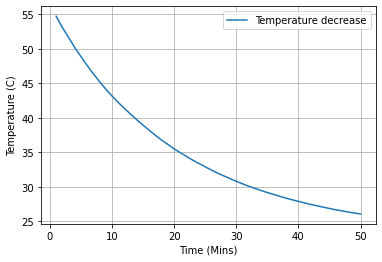

In [3]:
df1 = pd.read_csv('Temperature Decrease.csv', header = None)
#plt.figure(figsize=(9,6),dpi=200)
plt.grid()
plt.xlabel('Time (Mins)')
plt.ylabel('Temperature (C)')
plt.plot(df1[0], df1[1], label = 'Temperature decrease')
plt.legend()
#plt.savefig('TempDecrease.png')

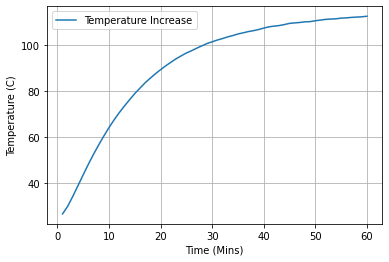

In [12]:
df2 = pd.read_csv('Min_Max.csv', header = None)
#plt.figure(figsize=(9,6),dpi=200)
plt.grid()
plt.xlabel('Time (Mins)')
plt.ylabel('Temperature (C)')
plt.plot(df2[0], df2[1], label = 'Temperature Increase')
plt.legend()
#plt.savefig('TempIncrease.png')

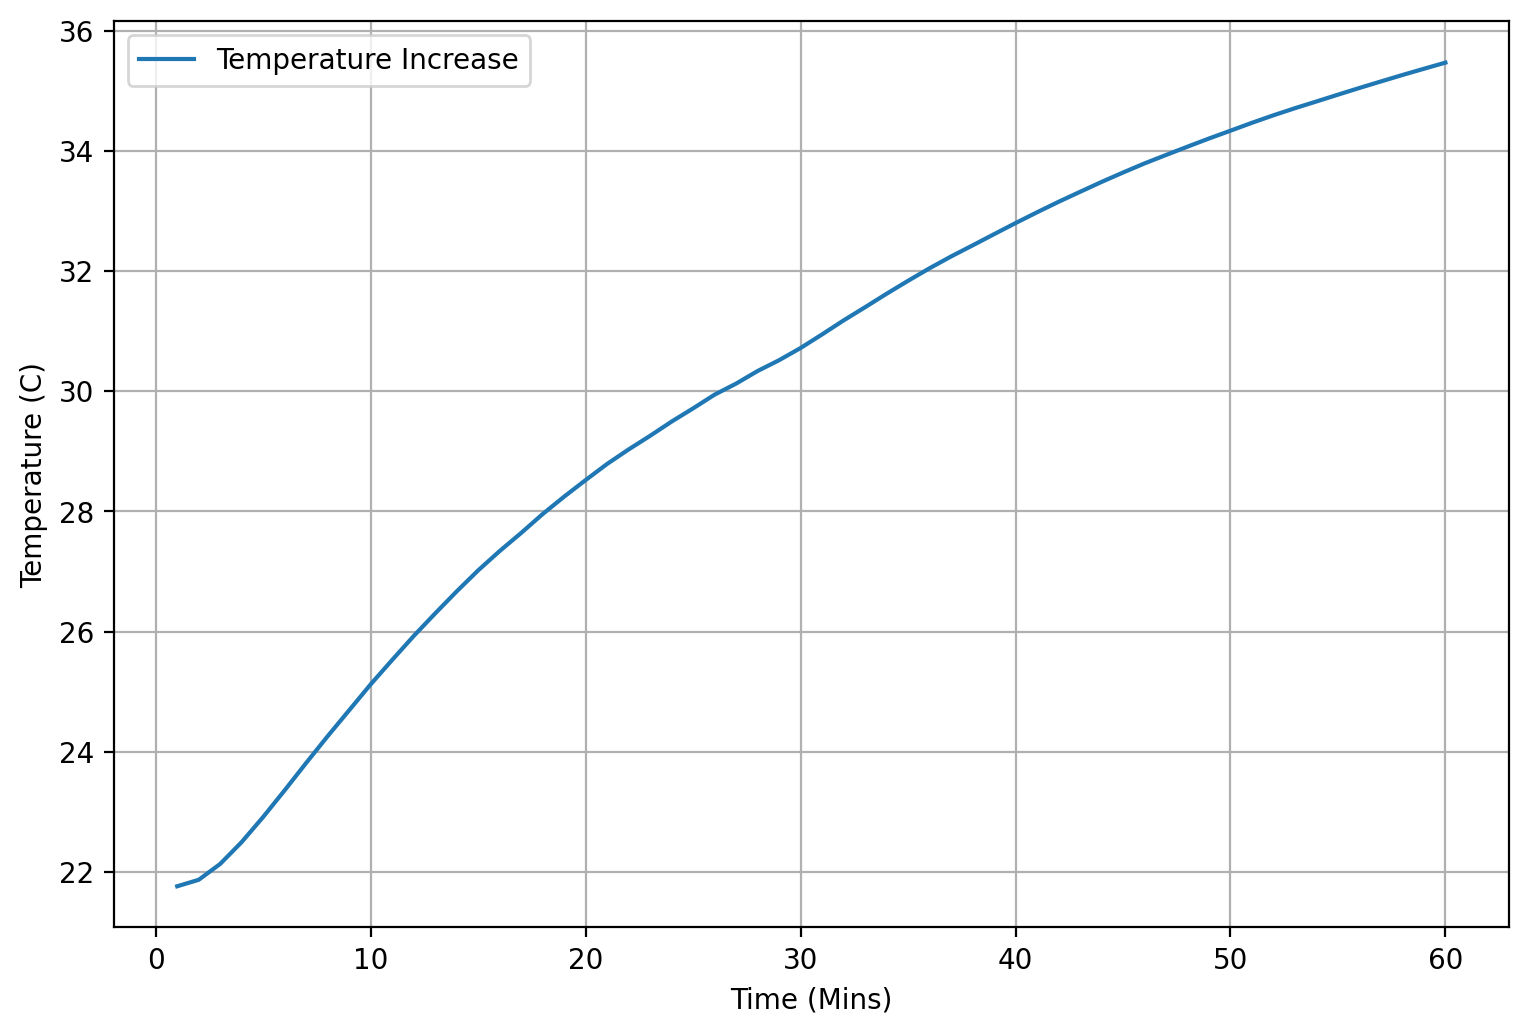

In [16]:
df3 = pd.read_csv('Min_4.csv', header = None)
plt.figure(figsize=(9,6),dpi=200)
plt.grid()
plt.xlabel('Time (Mins)')
plt.ylabel('Temperature (C)')
plt.plot(df3[0], df3[1], label = 'Temperature Increase')
plt.legend()
#plt.savefig('Min4.png')